Model post-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

movies = pd.read_pickle('movies_all_stars.pkl')


In [3]:
movies = movies[movies['title_year'] >= 2000]
movies = movies[movies['WorldwideGross_y'] > 0]
movies.duration=movies.duration.fillna(movies.duration.mean())

movies['rate_of_return'] = movies['WorldwideGross_y']/movies['ProductionBudget_y']
movies['ln_rate_of_return'] = np.log(movies['rate_of_return'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 43 columns):
color                        3179 non-null object
director_name                3182 non-null object
num_critic_for_reviews       3172 non-null float64
duration                     3182 non-null float64
director_facebook_likes      3182 non-null float64
actor_3_facebook_likes       3173 non-null float64
actor_2_name                 3182 non-null object
actor_1_facebook_likes       3177 non-null float64
gross                        2964 non-null float64
genres                       3182 non-null object
actor_1_name                 3182 non-null object
movie_title                  3182 non-null object
num_voted_users              3182 non-null int64
cast_total_facebook_likes    3182 non-null int64
actor_3_name                 3182 non-null object
facenumber_in_poster         3175 non-null float64
plot_keywords                3113 non-null object
movie_imdb_link              3182 non-

In [4]:
movies[movies.duration>250]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,ix_x,num_stars,DomesticGross_y,Movie_y,ProductionBudget_y,ReleaseDate_y,WorldwideGross_y,ix_y,rate_of_return,ln_rate_of_return
1029,Color,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12870569.0,Drama|History|War,...,921,0,12882934,Gods and Generals,55000000,2003-02-21,12923936,921,0.234981,-1.448252
3390,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,3425,0,454255,The Legend of Suriyothai,9000000,2003-06-20,454255,3425,0.050473,-2.986321


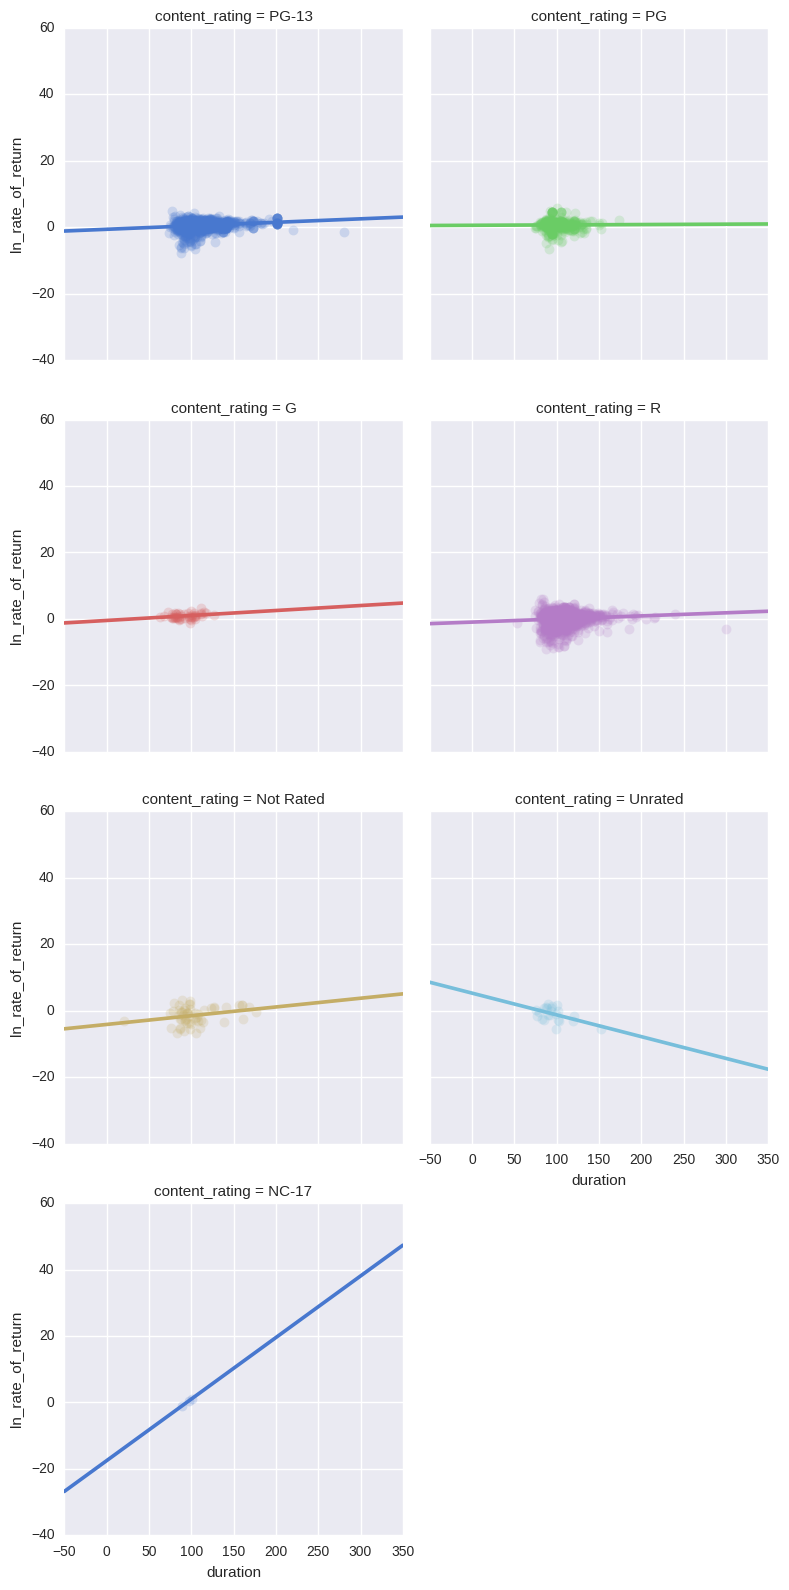

In [11]:
sns.lmplot(x="duration", y="ln_rate_of_return", col="content_rating", hue="content_rating", data=movies,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 0.2});